In [1]:
%load_ext autoreload
%autoreload 2

%load_ext watermark

import os
from io import StringIO

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
DATA_LOCATION = '/mnt/data/Processed_Data/'

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#miRNA" data-toc-modified-id="miRNA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>miRNA</a></span><ul class="toc-item"><li><span><a href="#Map-files-to-patients" data-toc-modified-id="Map-files-to-patients-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Map files to patients</a></span><ul class="toc-item"><li><span><a href="#Drop-unused-patients" data-toc-modified-id="Drop-unused-patients-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Drop unused patients</a></span></li></ul></li><li><span><a href="#Load-all-data" data-toc-modified-id="Load-all-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load all data</a></span></li><li><span><a href="#Scale-values" data-toc-modified-id="Scale-values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scale values</a></span></li><li><span><a href="#Save-to-files" data-toc-modified-id="Save-to-files-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Save to files</a></span></li></ul></li><li><span><a href="#mRNA" data-toc-modified-id="mRNA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>mRNA</a></span><ul class="toc-item"><li><span><a href="#Map-files-to-patients" data-toc-modified-id="Map-files-to-patients-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Map files to patients</a></span><ul class="toc-item"><li><span><a href="#Drop-unused-patients" data-toc-modified-id="Drop-unused-patients-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Drop unused patients</a></span></li></ul></li><li><span><a href="#Pick-gene-subset" data-toc-modified-id="Pick-gene-subset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pick gene subset</a></span><ul class="toc-item"><li><span><a href="#Compute-variance-for-all-genes" data-toc-modified-id="Compute-variance-for-all-genes-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Compute variance for all genes</a></span></li><li><span><a href="#Define-gene-subset" data-toc-modified-id="Define-gene-subset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Define gene subset</a></span></li></ul></li><li><span><a href="#Load-all-data" data-toc-modified-id="Load-all-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load all data</a></span></li><li><span><a href="#Scale-values" data-toc-modified-id="Scale-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Scale values</a></span></li><li><span><a href="#Save-to-files" data-toc-modified-id="Save-to-files-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Save to files</a></span></li></ul></li><li><span><a href="#DNA-methylation" data-toc-modified-id="DNA-methylation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DNA methylation</a></span><ul class="toc-item"><li><span><a href="#Map-files-to-patients" data-toc-modified-id="Map-files-to-patients-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Map files to patients</a></span><ul class="toc-item"><li><span><a href="#Drop-unused-patients" data-toc-modified-id="Drop-unused-patients-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Drop unused patients</a></span></li></ul></li><li><span><a href="#Pick-probe-subset" data-toc-modified-id="Pick-probe-subset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Pick probe subset</a></span><ul class="toc-item"><li><span><a href="#Save-to-file" data-toc-modified-id="Save-to-file-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Save to file</a></span></li><li><span><a href="#Compute-variance-for-all-selected-probes" data-toc-modified-id="Compute-variance-for-all-selected-probes-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Compute variance for all selected probes</a></span></li><li><span><a href="#Define-probe-subset" data-toc-modified-id="Define-probe-subset-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Define probe subset</a></span></li></ul></li><li><span><a href="#Load-all-data" data-toc-modified-id="Load-all-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Load all data</a></span></li><li><span><a href="#Replace-nan-by-median-value" data-toc-modified-id="Replace-nan-by-median-value-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Replace <code>nan</code> by median value</a></span></li><li><span><a href="#Save-to-files" data-toc-modified-id="Save-to-files-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Save to files</a></span></li></ul></li><li><span><a href="#CNV" data-toc-modified-id="CNV-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CNV</a></span><ul class="toc-item"><li><span><a href="#Map-aliquotes-to-patients" data-toc-modified-id="Map-aliquotes-to-patients-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Map aliquotes to patients</a></span></li><li><span><a href="#Load-all-data" data-toc-modified-id="Load-all-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Load all data</a></span></li><li><span><a href="#Are-there-unchanged-genes?" data-toc-modified-id="Are-there-unchanged-genes?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Are there unchanged genes?</a></span></li><li><span><a href="#Replace-aliquote-by-patient-IDs" data-toc-modified-id="Replace-aliquote-by-patient-IDs-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Replace aliquote by patient IDs</a></span><ul class="toc-item"><li><span><a href="#Check-duplicate-patient-IDs" data-toc-modified-id="Check-duplicate-patient-IDs-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Check duplicate patient IDs</a></span></li></ul></li><li><span><a href="#Encode-categorical-variables" data-toc-modified-id="Encode-categorical-variables-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Encode categorical variables</a></span><ul class="toc-item"><li><span><a href="#Drop-unused-patients" data-toc-modified-id="Drop-unused-patients-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Drop unused patients</a></span></li></ul></li><li><span><a href="#Keep-only-high-variance-genes" data-toc-modified-id="Keep-only-high-variance-genes-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Keep only high-variance genes</a></span></li><li><span><a href="#Save-to-files" data-toc-modified-id="Save-to-files-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Save to files</a></span></li></ul></li></ul></div>

# Functions <a class='tocSkip'></a>

In [3]:
def request_file_info(data_type):
    fields = [
        'file_name',
        'cases.submitter_id',
        'cases.samples.sample_type',
        'cases.project.project_id',
        'cases.project.primary_site',
        ]

    fields = ','.join(fields)

    files_endpt = 'https://api.gdc.cancer.gov/files'

    filters = {
        "op": "and",
        "content":[
            {
            "op": "in",
            "content":{
                "field": "files.experimental_strategy",
                "value": [data_type]
                }
            },
                        {
            "op": "in",
            "content":{
                "field": "files.access",
                "value": ['open']
                }
            }
        ]
    }

    params = {
        'filters': filters,
        'fields': fields,
        'format': 'TSV',
        'size': '200000'
        }

    response = requests.post(files_endpt, headers = {'Content-Type': 'application/json'}, json = params)

    return pd.read_csv(StringIO(response.content.decode('utf-8')), sep='\t')

In [4]:
def make_patient_file_map(df, base_dir):
    d = {}
    
    for _, row in df.iterrows():
        patient = row['cases.0.submitter_id']
        if patient in d:
            if not isinstance(d[patient], tuple):
                d[patient] = (
                    d[patient],
                    os.path.join(base_dir, row.id, row.file_name))
            else:
                d[patient] += os.path.join(base_dir, row.id, row.file_name),
        else:
            d[patient] = os.path.join(base_dir, row.id, row.file_name)

    return d

In [5]:
def min_max_scale(data, features, groups):
    train = data.loc[data.index.isin(groups['train']), features]

    scaler = MinMaxScaler()
    columns = train.columns
    scaler = scaler.fit(train[columns])
    
    data.loc[data.index.isin(groups['train']), features] = scaler.transform(
        train)
    data.loc[data.index.isin(groups['val']), features] = scaler.transform(
        data.loc[data.index.isin(groups['val']), features])
    data.loc[data.index.isin(groups['test']), features] = scaler.transform(
        data.loc[data.index.isin(groups['test']), features])
    
    return data

In [6]:
def table_to_patient_files(table, dir_path, round_digits=4):
    n = len(table)
    
    i = 0

    for index, row in table.iterrows():
        print('\r' + f'Save data to files: {str(i + 1)}/{n}', end='')
        i+= 1

        target_file = os.path.join(dir_path, str(index) + '.tsv')
        
        with open(target_file, 'w') as f:
            if round_digits is not None:
                f.write('\n'.join(str(round(value, round_digits)) for value in row.values))
            else:
                f.write('\n'.join(str(value) for value in row.values))

    print()
    print()

In [7]:
def merge_all_tables(table_list):
    n = len(table_list)
    
    final_table = pd.DataFrame()

    for i, table in enumerate(table_list):
        print('\r' + f'Merge data tables: {str(i + 1)}/{n}', end='')

        if final_table.empty:
            final_table = table
        else:
            final_table = final_table.join(table)
    
    print()
    print('Final table dimensions:', final_table.shape)
    print()

    return final_table

In [8]:
labels = pd.read_csv('labels.tsv', sep='\t')
labels.head()

,submitter_id,time,event,group
0,TCGA-Z7-A8R6,8.920548,0,train
1,TCGA-C8-A1HE,1.027397,0,train
2,TCGA-A8-A07B,3.583562,0,train
3,TCGA-AC-A2FM,2.169863,1,train
4,TCGA-B6-A1KF,8.460274,0,train


In [9]:
id_groups = {
    'train': list(labels.loc[labels['group'] == 'train', 'submitter_id']),
    'val': list(labels.loc[labels['group'] == 'val', 'submitter_id']),
    'test': list(labels.loc[labels['group'] == 'test', 'submitter_id'])}

# miRNA

## Map files to patients

Use the [GDC API](https://docs.gdc.cancer.gov/API/Users_Guide/Python_Examples/#using-python-to-query-the-gdc-api) to retrieve mapping between file names and patient IDs. Collect results as Pandas `DataFrame`.

In [219]:
%%time

miRNA_files = request_file_info(data_type='miRNA-Seq')
miRNA_files.shape

CPU times: user 107 ms, sys: 4.53 ms, total: 111 ms
Wall time: 15.8 s


(37378, 10)

In [220]:
miRNA_files.head()

,cases.0.project.primary_site,cases.0.project.project_id,cases.0.samples.0.sample_type,cases.0.samples.1.sample_type,cases.0.samples.2.sample_type,cases.0.samples.3.sample_type,cases.0.samples.4.sample_type,cases.0.submitter_id,file_name,id
0,NaN,HCMI-CMDC,Primary Tumor,NaN,NaN,NaN,NaN,HCM-STAN-0848-C20,5400e05b-1f35-4c9b-84f2-3f8e8b338d9a.mirnaseq....,340ef5c5-7353-49e6-8a3a-1409d51f202d
1,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-STAN-0848-C20,846aa5d9-68de-4d6b-aa47-e56c0b96a2b9.mirnaseq....,aa01ee25-be48-4eb8-befe-7c7ea390d92b
2,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-STAN-0848-C20,846aa5d9-68de-4d6b-aa47-e56c0b96a2b9.mirnaseq....,38d2a815-5f98-46c4-9691-934ccefe7610
3,NaN,HCMI-CMDC,Primary Tumor,NaN,NaN,NaN,NaN,HCM-STAN-0848-C20,5400e05b-1f35-4c9b-84f2-3f8e8b338d9a.mirnaseq....,e38ff1ea-a5f9-413a-bfff-9ec2806dd369
4,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-CSHL-0807-C54,24f427dd-9adb-4876-b3b1-1aae85d365b5.mirnaseq....,e82b1f6c-80fb-446c-82aa-577fd25dd57b


In [221]:
miRNA_files = miRNA_files[miRNA_files['cases.0.project.project_id'].str.startswith('TCGA-BRCA')]
miRNA_files = miRNA_files[miRNA_files['file_name'].str.endswith('mirbase21.mirnas.quantification.txt')]
miRNA_files = miRNA_files[miRNA_files['cases.0.samples.0.sample_type'] == 'Primary Tumor']
miRNA_files.shape

(1096, 10)

Some cases have more than one `*mirbase21.mirnas.quantification.txt` file. I suppose these are replicate runs for the same patient. Accordingly, checking some examples showed that `reads_per_million_miRNA_mapped` values were highly correlated. Here I will simply keep the first one in the table and drop the other ones. This decision may be revisited later on if deemed useful.

In [222]:
print('All rows:       ', miRNA_files.shape[0])
print('Unique patients:', miRNA_files['cases.0.submitter_id'].unique().shape[0])

All rows:        1096
Unique patients: 1078


In [223]:
miRNA_files = miRNA_files[~miRNA_files.duplicated(subset=['cases.0.submitter_id'], keep='first')]
miRNA_files.shape

(1078, 10)

In [224]:
file_map = make_patient_file_map(df=miRNA_files, base_dir='/mnt/data/RawData/miRNA/')

### Drop unused patients

Keep only patients present in label data.

In [225]:
len(file_map)

1078

In [226]:
labels = pd.read_csv('labels.tsv', sep='\t')
len(labels['submitter_id'])

1094

In [227]:
file_map = {k: file_map[k] for k in file_map if k in list(labels['submitter_id'])}

In [228]:
len(file_map)

1074

## Load all data

In [231]:
def load_all_miRNA_data(patient_file_map):
    n = len(patient_file_map)
    
    dfs = []
    for i, patient in enumerate(patient_file_map):
        try:
            print('\r' + f'Load data tables: {str(i + 1)}/{n}', end='')
            df = pd.read_csv(patient_file_map[patient], sep='\t',
                             usecols=['miRNA_ID', 'reads_per_million_miRNA_mapped'],
                             index_col=0)
            df.columns = [patient]
            dfs.append(df)

        except Exception as e:
            print(f"couldn't find file {e}")

    print()
    print()

    return dfs

In [232]:
%%time

data_tables = load_all_miRNA_data(patient_file_map=file_map)

Load data tables: 1074/1074

CPU times: user 2.15 s, sys: 250 ms, total: 2.4 s
Wall time: 5.29 s


In [233]:
%%time

miRNA = merge_all_tables(data_tables)

Merge data tables: 1074/1074
Final table dimensions: (1881, 1074)

CPU times: user 5.65 s, sys: 32.9 ms, total: 5.68 s
Wall time: 5.85 s


## Scale values

In [234]:
miRNA.shape

(1881, 1074)

In [235]:
miRNA.head()

,TCGA-EW-A1P1,TCGA-EW-A1IZ,TCGA-C8-A3M8,TCGA-AC-A5EH,TCGA-AC-A2QI,TCGA-AR-A0TZ,TCGA-A2-A25F,TCGA-BH-A0AW,TCGA-E9-A1N8,TCGA-BH-A0HK,...,TCGA-C8-A130,TCGA-BH-A0B8,TCGA-D8-A27N,TCGA-E2-A15H,TCGA-A7-A426,TCGA-AR-A24R,TCGA-E9-A243,TCGA-EW-A1PG,TCGA-V7-A7HQ,TCGA-A7-A3J0
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-1,8685.141890,5453.577054,7680.513820,5758.781791,39795.949557,5677.660885,6458.208867,5342.914100,7747.055657,7802.628915,...,7585.125277,17513.059811,9803.176855,6982.726550,7050.248365,9149.949297,8993.921979,9112.987742,11375.281134,16143.625595
hsa-let-7a-2,8737.635384,5369.814960,7628.424216,5731.055167,39660.130365,5611.180551,6600.205316,5325.427404,7857.541070,7837.406818,...,7626.900160,17483.549881,9616.318601,6935.993741,6907.829418,9092.122007,9203.254522,9233.538934,11458.666820,16091.873365
hsa-let-7a-3,8775.473334,5442.142863,7786.904379,5826.199267,39721.766849,5678.061369,6537.095783,5273.695930,7857.807943,7846.838114,...,7568.713716,17484.883663,9829.114686,6930.185144,7010.177084,9161.793440,9138.702636,9297.794994,11506.554986,16192.307777
hsa-let-7b,26408.757514,8291.915416,7275.836566,8908.222406,94361.331089,16107.464260,45151.715317,34282.666604,21514.765682,48941.941238,...,9691.772974,9559.716845,26926.644902,14033.836138,12770.487527,12262.868923,14974.193078,28940.246982,12371.890786,36084.680682
hsa-let-7c,6974.973127,1058.327401,1185.529901,2313.653824,3103.801144,1092.520201,3599.347027,2018.984722,2382.908814,719.431034,...,1294.424605,1175.062075,1733.599946,1685.285423,2728.420339,1261.401295,2364.443346,4189.153918,1537.779409,295.163140


In [236]:
miRNA = min_max_scale(data=miRNA.T, features=miRNA.T.columns, groups=id_groups)

In [237]:
miRNA.head()

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-EW-A1P1,0.117412,0.118689,0.118059,0.098458,0.114914,0.136420,0.060527,0.111020,0.111972,0.122492,...,0.0,0.018961,0.000000,0.024992,0.044194,0.0,0.032089,0.097138,0.096913,0.168910
TCGA-EW-A1IZ,0.062675,0.061858,0.061949,0.025966,0.015996,0.119519,0.032696,0.179331,0.179778,0.193380,...,0.0,0.064043,0.000000,0.024940,0.117606,0.0,0.136353,0.220624,0.033857,0.195382
TCGA-C8-A3M8,0.100395,0.099971,0.101419,0.021900,0.018123,0.064239,0.105410,0.218133,0.217088,0.080332,...,0.0,0.016139,0.000000,0.007682,0.115462,0.0,0.133628,0.114611,0.034869,0.061908
TCGA-AC-A5EH,0.067845,0.067954,0.068414,0.028432,0.036983,0.136804,0.056648,0.104458,0.105762,0.081549,...,0.0,0.012474,0.000000,0.001979,0.052495,0.0,0.116562,0.069038,0.054308,0.098752
TCGA-AC-A2QI,0.644369,0.640489,0.638978,0.370364,0.050193,0.074195,0.266330,0.446698,0.442614,0.158019,...,0.0,0.012444,0.049231,0.002632,0.074482,0.0,0.086682,0.192127,0.043751,0.085978


In [238]:
miRNA.loc[miRNA.index.isin(['TCGA-A8-A09K', 'TCGA-EW-A1OX', 'TCGA-A2-A3KD'])]

miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-EW-A1OX,0.120352,0.118015,0.119496,0.233424,0.001135,0.049764,0.039647,0.052792,0.052020,0.051078,...,0.0,0.010672,0.000000,0.000000,0.062877,0.0,0.258148,0.054426,0.001856,0.158100
TCGA-A8-A09K,0.053655,0.052968,0.054640,0.050218,0.007195,0.102970,0.071358,0.071638,0.069507,0.259397,...,0.0,0.007629,0.000000,0.000000,0.038524,0.0,0.176855,0.236688,0.008943,0.166663
TCGA-A2-A3KD,0.287816,0.288141,0.286581,0.099596,0.054540,0.065552,0.127638,0.301800,0.300540,0.118668,...,0.0,0.020063,0.119057,0.044564,0.180124,0.0,0.053791,0.102273,0.096785,0.066448


## Save to files

In [239]:
%%time

table_to_patient_files(
    miRNA, dir_path=os.path.join(DATA_LOCATION, 'miRNA-seq'), round_digits=4)

Save data to files: 1074/1074

CPU times: user 5.39 s, sys: 128 ms, total: 5.52 s
Wall time: 9.81 s


# mRNA

## Map files to patients

Use the [GDC API](https://docs.gdc.cancer.gov/API/Users_Guide/Python_Examples/#using-python-to-query-the-gdc-api) to retrieve mapping between file names and patient IDs. Collect results as Pandas `DataFrame`.

In [173]:
%%time

mRNA_files = request_file_info(data_type='RNA-Seq')
mRNA_files.shape

CPU times: user 87.5 ms, sys: 216 µs, total: 87.7 ms
Wall time: 11.9 s


(25504, 10)

In [174]:
mRNA_files.head()

,cases.0.project.primary_site,cases.0.project.project_id,cases.0.samples.0.sample_type,cases.0.samples.1.sample_type,cases.0.samples.2.sample_type,cases.0.samples.3.sample_type,cases.0.samples.4.sample_type,cases.0.submitter_id,file_name,id
0,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-SANG-1330-C19,3472a5d3-05ef-4b7b-a904-3476bd905aef.rna_seq.a...,9a740a2b-1199-457b-8d31-9a5e1ec76209
1,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-STAN-0848-C20,b437b05c-dd0d-4bf0-8a0c-d3f5b08fdf88.rna_seq.a...,91c6a2ff-acd8-4825-824e-783292020630
2,NaN,HCMI-CMDC,Primary Tumor,NaN,NaN,NaN,NaN,HCM-STAN-0848-C20,96d33b89-92f9-47dd-b70f-6c576d3309dd.rna_seq.a...,97a06a4c-827d-465a-a612-58e479b090d3
3,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-CSHL-0807-C54,2ab3664c-1dd8-4eff-bc41-cf262bcb6fcf.rna_seq.a...,165dc9de-cc01-4ab4-8bbb-1050ea5dabca
4,NaN,HCMI-CMDC,Primary Tumor,NaN,NaN,NaN,NaN,HCM-CSHL-0807-C54,52aa6268-8159-47c5-880a-41086c3db3e1.rna_seq.a...,1c009a68-b21b-43a7-95f1-3271ada2d5d9


In [175]:
mRNA_files = mRNA_files[mRNA_files['cases.0.project.project_id'].str.startswith('TCGA-BRCA')]
mRNA_files.shape

(1231, 10)

As for miRNA above, when there is more than one file for a single patient just keep the first one. Again, this decision may be revisited later on if deemed useful.

In [176]:
print('All rows:       ', mRNA_files.shape[0])
print('Unique patients:', mRNA_files['cases.0.submitter_id'].unique().shape[0])

All rows:        1231
Unique patients: 1095


In [177]:
mRNA_files = mRNA_files[~mRNA_files.duplicated(subset=['cases.0.submitter_id'], keep='first')]
mRNA_files.shape

(1095, 10)

In [178]:
file_map = make_patient_file_map(mRNA_files, base_dir='/mnt/data/RawData/RNA-seq_HTSeq_counts/')

### Drop unused patients

Keep only patients present in label data.

In [179]:
len(file_map)

1095

In [180]:
labels = pd.read_csv('labels.tsv', sep='\t')
len(labels['submitter_id'])

1094

In [181]:
file_map = {k: file_map[k] for k in file_map if k in list(labels['submitter_id'])}

In [182]:
len(file_map)

1091

In [183]:
print(next(iter(file_map.items())))

('TCGA-GM-A2DL', '/mnt/data/RawData/RNA-seq_HTSeq_counts/3396edba-0d2a-4485-ad0a-5114b38c1abe/2e64abe2-6024-4d28-9e09-560ce2a9fd15.rna_seq.augmented_star_gene_counts.tsv')


In [184]:
eg_file = file_map[list(file_map.keys())[0]]

In [185]:
print(eg_file)

/mnt/data/RawData/RNA-seq_HTSeq_counts/3396edba-0d2a-4485-ad0a-5114b38c1abe/2e64abe2-6024-4d28-9e09-560ce2a9fd15.rna_seq.augmented_star_gene_counts.tsv


## Pick gene subset

Most genes are probably not informative. Check variance of each gene across patients and remove low-variance genes to reduce data size.

Calculate variance iteratively for gene subsets, to avoid memory issues.

### Compute variance for all genes

Run dedicated script (found here in `src/scripts` directory) as follows:

```bash
$ conda activate ig
$ python ./compute_gene_variance.py \
   -i /mnt/dataA/TCGA/raw/RNA-seq_FPKM-UQ/
   -s 10000 \
   -o /mnt/dataA/TCGA/raw/RNA-seq_FPKM-UQ_variance.tsv
```

### Define gene subset

Keep a sensible number of genes showing the highest variance across patients.

Running the model on mRNA data after keeping increasing numbers of genes (500, 750, 1'000, or 2'000) showed slight increases in training data C-index (~2 percentage points). Picked the subset yielding highest validation C-index.

In [186]:
# Load computed variance table
%matplotlib inline
variance_table = pd.read_csv('/mnt/data/RawData/RNA-seq_FPKM-UQ_variance.tsv', sep='\t',
                             header=None, index_col=0, names=['Var'])

In [187]:
print(f'# of represented mRNAs: {len(variance_table)}')

# of represented mRNAs: 60001


In [188]:
variance_table.head()

,Var
NaN,0.0
N_unmapped,NaN
N_multimapping,NaN
N_noFeature,NaN
N_ambiguous,NaN


In [189]:
variance_table.sort_values('Var', ascending=False).head(10)

,Var
ENSG00000276168.1,2.793152e+08
ENSG00000211592.8,1.674270e+08
ENSG00000198712.1,5.531443e+07
ENSG00000210082.2,5.469891e+07
ENSG00000198938.2,4.909774e+07
ENSG00000198886.2,4.215130e+07
ENSG00000198804.2,3.433871e+07
ENSG00000211459.2,2.268481e+07
ENSG00000202538.1,2.195147e+07
ENSG00000198840.2,2.036335e+07


In [190]:
variance_table.describe()

,Var
count,5.999700e+04
mean,1.605718e+04
std,1.419498e+06
min,0.000000e+00
25%,1.769462e-03
50%,4.442546e-02
75%,1.566096e+00
max,2.793152e+08


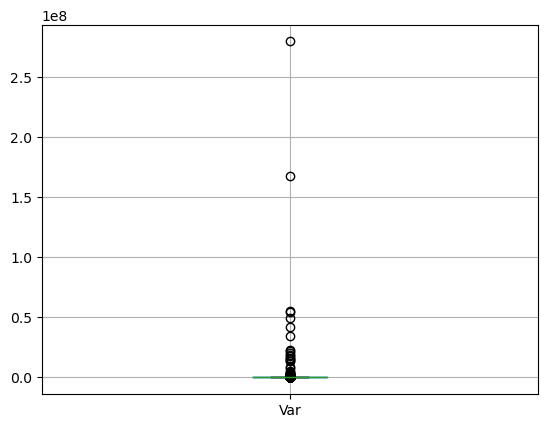

In [191]:
variance_table.boxplot()
plt.show()

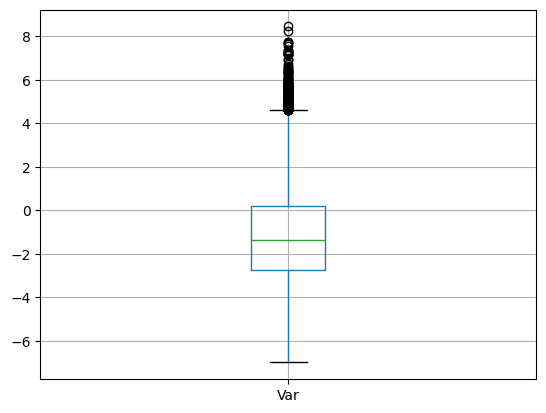

In [192]:
e = 1e-7
np.log10(variance_table + e).boxplot()
plt.show()

In [193]:
len(variance_table[variance_table['Var'] > 1e9])

0

<Axes: >

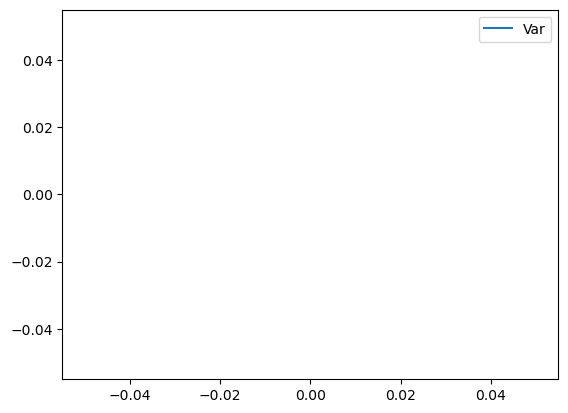

In [194]:
variance_table[variance_table['Var'] > 1e9].sort_values(by='Var', ascending=False).plot(use_index=False)

In [195]:
# Variance quantile to drop all genes but the top 2k
q = (variance_table.shape[0] - 2e3) / variance_table.shape[0]
print(f'Percentile = {round(q * 100, 1)}%')

variance_table[variance_table['Var'] > variance_table['Var'].quantile(q=q)].shape

Percentile = 96.7%


(2000, 1)

In [196]:
# Variance quantile to drop all genes but the top 1k
q = (variance_table.shape[0] - 1e3) / variance_table.shape[0]
print(f'Percentile = {round(q * 100, 1)}%')

variance_table[variance_table['Var'] > variance_table['Var'].quantile(q=q)].shape

Percentile = 98.3%


(1000, 1)

In [197]:
# Get IDs for all genes to keep
genes_to_keep = list(variance_table[variance_table['Var'] > variance_table['Var'].quantile(q=q)].index)
genes_to_keep[:5]

['ENSG00000002834.18',
 'ENSG00000003989.18',
 'ENSG00000004478.8',
 'ENSG00000004799.8',
 'ENSG00000005022.6']

In [198]:
len(genes_to_keep)

1000

## Load all data

In [199]:
def load_all_mRNA_data(patient_file_map, genes):
    n = len(patient_file_map)

    dfs = []
    for i, patient in enumerate(patient_file_map):
        print('\r' + f'Load data tables: {str(i + 1)}/{n}', end='')

        try:
            df = pd.read_csv(
                patient_file_map[patient],
                sep='\t',
                comment='#',
                usecols=['gene_id', 'fpkm_uq_unstranded'],
                index_col='gene_id'
            )
            df = df.loc[genes]
            df.columns = [patient]
            dfs.append(df)
        except Exception as e:
            print(f'\nError reading {patient}: {e}')
            continue

    print("\nAll files processed.")
    return dfs

In [200]:
%%time

data_tables = load_all_mRNA_data(patient_file_map=file_map, genes=genes_to_keep)

Load data tables: 1091/1091
All files processed.
CPU times: user 43.3 s, sys: 923 ms, total: 44.2 s
Wall time: 1min 5s


In [201]:
data_tables[0].head()

,TCGA-GM-A2DL
gene_id,
ENSG00000002834.18,38.7618
ENSG00000003989.18,55.8390
ENSG00000004478.8,43.5916
ENSG00000004799.8,9.4728
ENSG00000005022.6,148.0071


In [202]:
%%time

mRNA = merge_all_tables(data_tables)

Merge data tables: 1091/1091
Final table dimensions: (1000, 1091)

CPU times: user 4.64 s, sys: 12.5 ms, total: 4.66 s
Wall time: 4.65 s


## Scale values

In [203]:
mRNA.shape

(1000, 1091)

In [204]:
mRNA.head()

,TCGA-GM-A2DL,TCGA-AC-A2QI,TCGA-A8-A06R,TCGA-EW-A1PD,TCGA-AO-A12D,TCGA-AR-A24N,TCGA-AR-A24U,TCGA-D8-A1JU,TCGA-A8-A0AD,TCGA-E2-A3DX,...,TCGA-B6-A0X1,TCGA-E9-A1N3,TCGA-AN-A0FS,TCGA-AC-A7VB,TCGA-LD-A7W5,TCGA-B6-A0RL,TCGA-C8-A8HP,TCGA-EW-A3U0,TCGA-D8-A1J9,TCGA-V7-A7HQ
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000002834.18,38.7618,81.5740,42.0077,108.8795,42.5936,39.1677,94.4382,47.2772,37.0220,80.9109,...,16.4900,87.5576,63.5658,106.5319,53.9063,58.9485,127.6441,39.5484,56.0162,12.1864
ENSG00000003989.18,55.8390,1.6072,33.5276,31.1039,12.7217,52.5588,7.5343,52.8019,123.1657,111.2800,...,0.6245,279.6572,2.4226,1.5031,5.7174,35.3581,14.5469,0.8810,8.5306,15.1066
ENSG00000004478.8,43.5916,22.9972,40.1139,29.1838,38.9696,61.8528,46.6965,26.7062,62.2038,48.2225,...,118.4402,152.0113,75.8977,157.1474,84.7876,108.2667,49.9374,25.6554,53.1612,123.0657
ENSG00000004799.8,9.4728,2.8100,2.2644,24.6291,2.7891,1.6396,15.9925,21.1279,3.0102,39.9655,...,1.8107,5.5675,23.3435,4.4904,16.9629,1.1368,6.7449,20.4638,1.8613,1.1628
ENSG00000005022.6,148.0071,112.3498,139.3246,240.6578,181.5560,101.4310,136.9449,97.6980,121.0870,84.9813,...,170.2044,108.9765,111.7733,164.9333,104.3173,94.2344,86.2594,193.3169,166.0449,187.7162


In [205]:
mRNA = min_max_scale(data=mRNA.T, features=mRNA.T.columns, groups=id_groups)

In [206]:
mRNA.head()

gene_id,ENSG00000002834.18,ENSG00000003989.18,ENSG00000004478.8,ENSG00000004799.8,ENSG00000005022.6,ENSG00000008988.11,ENSG00000009307.16,ENSG00000010278.15,ENSG00000011465.18,ENSG00000011600.12,...,ENSG00000278196.3,ENSG00000278746.1,ENSG00000278771.1,ENSG00000279483.2,ENSG00000280411.1,ENSG00000281383.1,ENSG00000281990.1,ENSG00000282122.1,ENSG00000282639.1,ENSG00000282651.2
TCGA-GM-A2DL,0.037768,0.103715,0.102467,0.007588,0.119506,0.101252,0.140214,0.299438,0.153451,0.103712,...,0.000452,0.0,0.000032,0.074761,0.000096,0.001848,0.000046,0.000019,0.000068,0.000000
TCGA-AC-A2QI,0.090127,0.002961,0.045449,0.002198,0.084843,0.039352,0.093863,0.122466,0.124871,0.075453,...,0.006729,0.0,0.000021,0.135510,0.000936,0.000953,0.000005,0.000013,0.001737,0.002655
TCGA-A8-A06R,0.041738,0.062264,0.092839,0.001757,0.111066,0.114264,0.091403,0.061660,0.140078,0.057044,...,0.006643,0.0,0.000249,0.154790,0.077905,0.001530,0.000170,0.000143,0.006669,0.025660
TCGA-EW-A1PD,0.123521,0.057761,0.062577,0.019847,0.209575,0.043508,0.081104,0.103726,0.080371,0.036091,...,0.000400,0.0,0.000015,0.069984,0.000045,0.001714,0.000005,0.000013,0.000066,0.000534
TCGA-AO-A12D,0.042454,0.023610,0.089670,0.002181,0.152120,0.063975,0.219397,0.110046,0.147255,0.068193,...,0.249273,0.0,0.000106,0.092126,0.030202,0.001010,0.000030,0.000660,0.001195,0.000836


## Save to files

In [207]:
%%time

table_to_patient_files(
    mRNA, dir_path=os.path.join(DATA_LOCATION, 'RNA-seq'), round_digits=4)

Save data to files: 1091/1091

CPU times: user 2.7 s, sys: 130 ms, total: 2.83 s
Wall time: 5.73 s


# DNA methylation

As explained in the GDC [Methylation Liftover Pipeline page](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Methylation_LO_Pipeline/), data was generated using either Illumina Infinium Human Methylation 27 (HM27; 27'578 probes) or HumanMethylation450 (HM450; 485'577 probes).

Use the intersection of the probes between the two (25'978 probes).

## Map files to patients

Use the [GDC API](https://docs.gdc.cancer.gov/API/Users_Guide/Python_Examples/#using-python-to-query-the-gdc-api) to retrieve mapping between file names and patient IDs. Collect results as Pandas `DataFrame`.

In [240]:
%%time

DNAm_files = request_file_info(data_type='Methylation Array')
DNAm_files.shape

CPU times: user 157 ms, sys: 47.3 ms, total: 204 ms
Wall time: 16.4 s


(50913, 10)

In [241]:
DNAm_files.head()

,cases.0.project.primary_site,cases.0.project.project_id,cases.0.samples.0.sample_type,cases.0.samples.1.sample_type,cases.0.samples.2.sample_type,cases.0.samples.3.sample_type,cases.0.samples.4.sample_type,cases.0.submitter_id,file_name,id
0,NaN,HCMI-CMDC,Metastatic,NaN,NaN,NaN,NaN,HCM-BROD-0594-C43,450e8639-47ee-4919-8b96-9770d8235a6b_noid_Red....,f6199abb-979e-4124-b24b-861d2bfb5b97
1,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-BROD-0594-C43,aa66a442-b5f2-4e7b-87b2-bb24128e0ec7_noid_Grn....,7f322d1b-59cf-4cee-8fb6-46b4ef3dfd86
2,NaN,HCMI-CMDC,Metastatic,NaN,NaN,NaN,NaN,HCM-BROD-0594-C43,450e8639-47ee-4919-8b96-9770d8235a6b_noid_Grn....,00571b59-8fcf-4cb5-ac4e-b9dac2f9a361
3,NaN,HCMI-CMDC,Metastatic,NaN,NaN,NaN,NaN,HCM-BROD-0594-C43,450e8639-47ee-4919-8b96-9770d8235a6b.methylati...,2ebbca96-cf79-4d4c-bc2b-ed719501e41f
4,NaN,HCMI-CMDC,Next Generation Cancer Model,NaN,NaN,NaN,NaN,HCM-BROD-0594-C43,aa66a442-b5f2-4e7b-87b2-bb24128e0ec7.methylati...,1e1a7806-c565-4788-9d82-f3158d331f67


In [242]:
DNAm_files = DNAm_files[DNAm_files['cases.0.project.project_id'].str.startswith('TCGA-BRCA')]
DNAm_files = DNAm_files[DNAm_files['file_name'].str.endswith('.txt')]
DNAm_files = DNAm_files[DNAm_files['cases.0.samples.0.sample_type'] == 'Primary Tumor']
DNAm_files.shape

(1107, 10)

As for miRNA above, when there is more than one file for a single patient just keep the first one. Again, this decision may be revisited later, if deemed useful.

In [243]:
print('All rows:       ', DNAm_files.shape[0])
print('Unique patients:', DNAm_files['cases.0.submitter_id'].unique().shape[0])

All rows:        1107
Unique patients: 1097


In [244]:
DNAm_files = DNAm_files[~DNAm_files.duplicated(subset=['cases.0.submitter_id'], keep='first')]
DNAm_files.shape

(1097, 10)

In [5]:
# check for undownloaded files and create a new subset manifest
manifest_path = '/app/data/manifests/RNA-subset_manifest.txt'
download_dir = '/mnt/data/RawData/RNA-seq/'
subset_manifest_path = '/app/data/manifests/subset_manifest.txt'

# Load manifest
manifest = pd.read_csv(manifest_path, sep='\t')

# Recursively get all filenames in the download directory
downloaded_files = []
for root, dirs, files in os.walk(download_dir):
    for file in files:
        downloaded_files.append(file)

# Filter: Keep only rows where filename is NOT in downloaded files
not_downloaded = manifest[~manifest['filename'].isin(downloaded_files)]

# Save to new manifest
not_downloaded.to_csv(subset_manifest_path, sep='\t', index=False)

print(f"Subset manifest saved with {len(not_downloaded)} files.")

Subset manifest saved with 0 files.


In [247]:
file_map = make_patient_file_map(DNAm_files, base_dir='/mnt/data/RawData/DNA-methylation/')

### Drop unused patients

Keep only patients present in label data.

In [248]:
len(file_map)

1097

In [249]:
labels = pd.read_csv('/app/data/labels.tsv', sep='\t')
len(labels['submitter_id'])

1094

In [250]:
file_map = {k: file_map[k] for k in file_map if k in list(labels['submitter_id'])}

In [251]:
len(file_map)

1093

## Pick probe subset

Check a small subset of 100 files to get an idea of the types of data and their proportions in the dataset.

In [252]:
%%time

# List number of probes per file
total_n_lines = []
i = 0

for patient in file_map:
    if i > 100:
        break
    if isinstance(file_map[patient], tuple):
        try:
            total_n_lines += [
                len(pd.read_csv(
                    f, sep='\t', index_col=0, header=None, names=['probe_id', 'Beta_value']
                ))
                for f in file_map[patient]
            ]
            i += 1
        except Exception as e:
            print(f"couldn't open file {e}")
    else:
        try:
            total_n_lines.append(len(pd.read_csv(
                file_map[patient], sep='\t', index_col=0, header=None, names=['probe_id', 'Beta_value']
            )))
            i += 1
        except Exception as e:
            print(f"couldn't open file {e}")

CPU times: user 15.1 s, sys: 347 ms, total: 15.4 s
Wall time: 34.8 s


In [253]:
set(total_n_lines)

{27578, 486427}

In [254]:
element = 27578
total_n_lines.count(element)

28

In [255]:
element = 485577
total_n_lines.count(element)

0

In [278]:
eg_file = file_map[list(file_map.keys())[100]]
total_n_lines = len(list(pd.read_csv(
    eg_file, sep='\t', index_col=0, header=None, names=['probe_id', 'Beta_value'])))
total_n_lines

1

In [279]:
DNAm = pd.read_csv(eg_file, sep='\t', header=None, names=['probe_id', 'Beta_value'])

In [280]:
DNAm.head()

,probe_id,Beta_value
0,cg00000029,0.118549
1,cg00000108,0.937296
2,cg00000109,0.912450
3,cg00000165,0.163223
4,cg00000236,0.927886


In [281]:
DNAm.shape

(486427, 2)

In [282]:
probes = list(DNAm['probe_id'])
probes[:5]

['cg00000029', 'cg00000108', 'cg00000109', 'cg00000165', 'cg00000236']

In [283]:
DNAm = pd.read_csv('/mnt/data/RawData/DNA-methylation/00c656d5-afb4-475e-aada-81ed728c42e4/ee2026e1-ac8e-420b-ab7f-9aa12b334875.methylation_array.sesame.level3betas.txt',
                   sep='\t', header=None, names=['probe_id', 'Beta_value'])

In [284]:
DNAm.head()

,probe_id,Beta_value
0,cg00000292,0.865310
1,cg00002426,0.907322
2,cg00003994,0.344859
3,cg00005847,0.781468
4,cg00006414,0.038359


In [285]:
DNAm.shape

(27578, 2)

In [287]:
DNAm[DNAm['probe_id'] == 'cg00000292']

,probe_id,Beta_value
0,cg00000292,0.86531


In [290]:
%%time

print('# Illumina Infinium Human Methylation 27 (HM27) probes found in HumanMethylation450 (HM450):')
print(sum([p in probes for p in list(DNAm['probe_id'])]))
print()

# Illumina Infinium Human Methylation 27 (HM27) probes found in HumanMethylation450 (HM450):
25978

CPU times: user 1min 8s, sys: 9.86 ms, total: 1min 8s
Wall time: 1min 9s


Use the intersection of the probe sets in the two technologies (25'978 according to the two example files used here).

In [291]:
probe_set = [p for p in list(DNAm['probe_id']) if p in probes]

In [292]:
len(probe_set)

25978

In [293]:
probe_set[:10]

['cg00000292',
 'cg00002426',
 'cg00003994',
 'cg00005847',
 'cg00006414',
 'cg00007981',
 'cg00008493',
 'cg00008713',
 'cg00009407',
 'cg00011459']

### Save to file

In [294]:
target_file = '/app/data/DNAm_probes.tsv'

In [295]:
with open(target_file, 'w') as f:
    f.write('\n'.join(str(value) for value in probe_set))

In [296]:
pd.read_csv(target_file, sep='\t', header=None, names=['Probes']).head()

,Probes
0,cg00000292
1,cg00002426
2,cg00003994
3,cg00005847
4,cg00006414


In [297]:
pd.read_csv(target_file, sep='\t', header=None, names=['Probes']).shape

(25978, 1)

### Compute variance for all selected probes

Run dedicated script (found here in `src/scripts` directory) as follows:

```bash
$ conda activate ig
$ python ./compute_DNAm_variance.py \
   -i /mnt/dataA/TCGA/raw/Methylation/ \
   -s 5000 \
   -l ../data/labels.tsv \
   -p ../data/DNAm_probes.tsv \
   -o /mnt/dataA/TCGA/raw/DNA_methylation_Beta-value_variance.tsv
```

### Define probe subset

Keep a sensible number of probes showing the highest variance across patients.

In [298]:
# Load computed variance table
variance_table = pd.read_csv('/mnt/data/RawData/DNA_methylation_Beta-value_variance.tsv', sep='\t',
                             header=None, index_col=0, names=['Var'])

In [299]:
variance_table.head()

,Var
probe_id,0.000000
cg00000292,0.027874
cg00002426,0.045939
cg00003994,0.036346
cg00005847,0.038839


In [300]:
variance_table.sort_values('Var', ascending=False).head(10)

,Var
cg22621695,0.186359
cg25631352,0.121659
cg22318304,0.111382
cg06168050,0.106777
cg21634602,0.094447
cg02800334,0.093263
cg04336379,0.092859
cg08786003,0.092697
cg23557926,0.091708
cg08585897,0.090343


In [301]:
variance_table.describe()

,Var
count,24439.000000
mean,0.013074
std,0.016416
min,0.000000
25%,0.000510
50%,0.004681
75%,0.021945
max,0.186359


<Axes: >

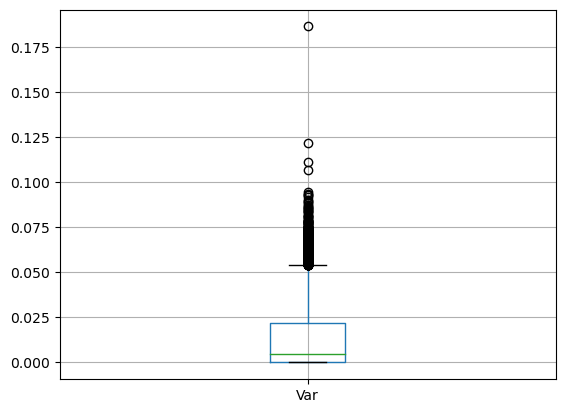

In [302]:
variance_table.boxplot()

<Axes: >

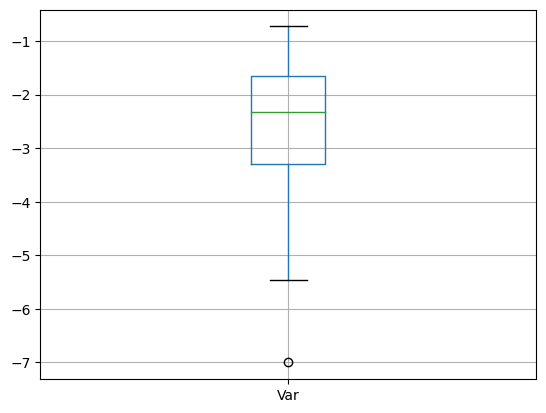

In [303]:
e = 1e-7
np.log10(variance_table + e).boxplot()

<Axes: >

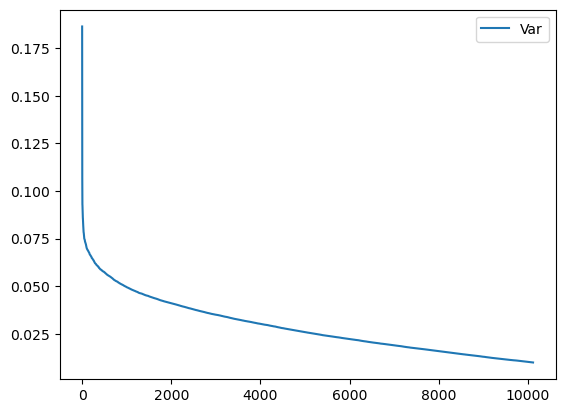

In [304]:
variance_table[variance_table['Var'] > 1e-2].sort_values(by='Var', ascending=False).plot(use_index=False)

In [305]:
# Variance quantile to drop all genes but the chosen number of probes showing the top variance
# (since there are quite a lot of missing values, the result is lower than the selected number of probes)
q = (variance_table.shape[0] - 4e3) / variance_table.shape[0]
print(f'Percentile = {round(q * 100, 1)}%')

variance_table[variance_table['Var'] > variance_table['Var'].quantile(q=q)].shape

Percentile = 84.6%


(3764, 1)

In [306]:
# Get IDs for all probes to keep
probes_to_keep = list(variance_table[variance_table['Var'] > variance_table['Var'].quantile(q=q)].index)
probes_to_keep[:5]

['cg00002426', 'cg00003994', 'cg00005847', 'cg00015770', 'cg00027083']

In [307]:
len(probes_to_keep)

3764

## Load all data

In [308]:
def load_all_DNAm_data(patient_file_map, probes):
    n = len(patient_file_map)
    
    dfs = []
    for i, patient in enumerate(patient_file_map):
        print('\r' + f'Load data tables: {str(i + 1)}/{n}', end='')
        df = pd.read_csv(patient_file_map[patient], sep='\t', index_col=0,
                         header=None, names=['probe_id', 'Beta_value'])
        df = df.loc[probes]
        df.columns = [patient]
        dfs.append(df)

    print()
    print()

    return dfs

In [309]:
%%time

data_tables = load_all_DNAm_data(patient_file_map=file_map, probes=probes_to_keep)

Load data tables: 1093/1093

CPU times: user 3min 36s, sys: 3.11 s, total: 3min 39s
Wall time: 4min 55s


In [310]:
data_tables[0].head()

,TCGA-C8-A27B
probe_id,
cg00002426,0.421354
cg00003994,0.064938
cg00005847,0.814548
cg00015770,0.201771
cg00027083,0.290690


In [311]:
%%time

DNAm = merge_all_tables(data_tables)

Merge data tables: 1093/1093
Final table dimensions: (3764, 1093)

CPU times: user 8.76 s, sys: 21.3 ms, total: 8.78 s
Wall time: 8.77 s


__Note:__ There is <font style="color:red">no need to scale DNA methylation Beta Values</font> here, since they are already in the interval [0, 1].

In [312]:
DNAm.shape

(3764, 1093)

In [313]:
DNAm.head()

,TCGA-C8-A27B,TCGA-AN-A03Y,TCGA-BH-A0C1,TCGA-E9-A3Q9,TCGA-C8-A3M8,TCGA-E9-A5FL,TCGA-BH-A1FU,TCGA-A2-A25F,TCGA-A1-A0SE,TCGA-E2-A15D,...,TCGA-C8-A130,TCGA-AO-A03L,TCGA-AC-A6NO,TCGA-EW-A2FS,TCGA-A7-A0CJ,TCGA-AR-A0TY,TCGA-BH-A1FG,TCGA-EW-A1PG,TCGA-LL-A7T0,TCGA-V7-A7HQ
probe_id,,,,,,,,,,,,,,,,,,,,,
cg00002426,0.421354,0.374008,0.213022,0.352034,0.442286,0.535688,0.489078,0.803347,0.373084,0.102461,...,0.112796,0.499183,0.229813,0.536103,0.081299,0.063622,0.360341,0.390927,0.600891,0.323984
cg00003994,0.064938,0.160486,0.376505,0.052670,0.262356,0.070710,0.085596,0.166098,0.288657,0.192398,...,0.202281,NaN,0.087380,0.367957,0.780919,0.023227,0.385231,0.103732,0.344675,0.079531
cg00005847,0.814548,0.778817,0.747715,0.264641,0.853581,0.780621,0.570088,0.366866,0.817702,0.822104,...,0.866464,0.327743,0.703181,0.731050,0.844978,0.316889,0.362660,0.509496,0.820899,0.500611
cg00015770,0.201771,0.628163,0.245896,0.138450,0.656739,0.116577,0.398008,0.310521,0.375028,0.102108,...,0.226446,0.313297,0.265372,0.647886,0.800948,0.161205,0.139787,0.200356,0.590954,0.183636
cg00027083,0.290690,0.685619,0.089533,0.197009,0.525465,0.024771,0.085642,0.196347,0.029694,0.665533,...,0.372084,0.468527,0.095972,0.536926,0.755193,0.774837,0.061694,0.033961,0.064921,0.050058


In [314]:
DNAm=DNAm.T

In [315]:
DNAm.head()

probe_id,cg00002426,cg00003994,cg00005847,cg00015770,cg00027083,cg00027674,cg00030047,cg00035347,cg00041575,cg00043004,...,cg27626299,cg27626424,cg27631256,cg27631817,cg27637521,cg27641018,cg27644292,cg27650175,cg27652350,cg27653134
TCGA-C8-A27B,0.421354,0.064938,0.814548,0.201771,0.290690,0.142026,0.729854,0.575772,0.734093,0.143452,...,0.307540,0.900900,0.743959,0.759491,0.071725,0.575454,0.574767,0.041195,0.195791,0.484254
TCGA-AN-A03Y,0.374008,0.160486,0.778817,0.628163,0.685619,0.382407,0.515290,0.316401,0.637118,0.363287,...,0.763619,0.965546,0.805409,0.880265,0.307674,0.855679,NaN,0.585706,0.812834,0.750989
TCGA-BH-A0C1,0.213022,0.376505,0.747715,0.245896,0.089533,0.193884,0.551020,0.623334,0.569246,0.328318,...,0.542883,0.964754,0.838587,0.682600,0.575657,NaN,0.646220,0.123071,0.581358,0.551234
TCGA-E9-A3Q9,0.352034,0.052670,0.264641,0.138450,0.197009,0.397806,0.425997,0.343251,0.205654,0.700618,...,0.268985,0.275437,0.487180,0.804163,0.118438,0.727755,0.393782,0.050707,0.507266,0.488052
TCGA-C8-A3M8,0.442286,0.262356,0.853581,0.656739,0.525465,0.560140,0.642564,0.418513,0.506299,0.221477,...,0.523865,0.803481,0.755073,0.713207,0.065676,0.744153,0.544143,0.041645,0.646646,0.816659


## Replace `nan` by median value

In [316]:
DNAm.isna().sum()

probe_id
cg00002426      1
cg00003994     20
cg00005847      0
cg00015770      0
cg00027083      0
             ... 
cg27641018    180
cg27644292    192
cg27650175      3
cg27652350      0
cg27653134      0
Length: 3764, dtype: int64

In [317]:
DNAm.median()

probe_id
cg00002426    0.377888
cg00003994    0.125231
cg00005847    0.683951
cg00015770    0.250861
cg00027083    0.147952
                ...   
cg27641018    0.819288
cg27644292    0.541823
cg27650175    0.040622
cg27652350    0.624392
cg27653134    0.723013
Length: 3764, dtype: float64

In [318]:
DNAm.fillna(DNAm.median()).isna().sum()

probe_id
cg00002426    0
cg00003994    0
cg00005847    0
cg00015770    0
cg00027083    0
             ..
cg27641018    0
cg27644292    0
cg27650175    0
cg27652350    0
cg27653134    0
Length: 3764, dtype: int64

In [319]:
DNAm = DNAm.fillna(DNAm.median())

## Save to files

In [320]:
%%time

table_to_patient_files(
    DNAm, dir_path=os.path.join(DATA_LOCATION, 'DNAm'), round_digits=4)

Save data to files: 1093/1093

CPU times: user 9.31 s, sys: 116 ms, total: 9.43 s
Wall time: 12.5 s


# CNV

## Map aliquotes to patients

Use the [GDC API](https://docs.gdc.cancer.gov/API/Users_Guide/Python_Examples/#using-python-to-query-the-gdc-api) to retrieve mapping of aliquote IDs to patients found in the 33 tables (one per cancer entity). Collect results as Pandas `DataFrame`.

In [329]:
%%time

response = requests.get('https://api.gdc.cancer.gov/cases',
                        params={
                            'fields': 'cases.samples.portions.analytes.aliquots',
                            'format': 'TSV',
                            'size': '200000'
                        })
cnv_aliquotes = pd.read_csv(StringIO(response.content.decode("utf-8")), sep="\t")

<timed exec>:7: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,140,141,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,174,175,176,177,178,179,180,181,182,183,184,185,186,187,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,2

CPU times: user 2.27 s, sys: 916 ms, total: 3.19 s
Wall time: 1min 27s


In [330]:
cnv_aliquotes = cnv_aliquotes.set_index('submitter_id')
cnv_aliquotes.shape

(45087, 482)

In [331]:
cnv_aliquotes.head()

,aliquot_ids.0,aliquot_ids.1,aliquot_ids.10,aliquot_ids.100,aliquot_ids.101,aliquot_ids.102,aliquot_ids.103,aliquot_ids.104,aliquot_ids.105,aliquot_ids.106,...,submitter_slide_ids.3,submitter_slide_ids.30,submitter_slide_ids.31,submitter_slide_ids.4,submitter_slide_ids.5,submitter_slide_ids.6,submitter_slide_ids.7,submitter_slide_ids.8,submitter_slide_ids.9,updated_datetime
submitter_id,,,,,,,,,,,,,,,,,,,,,
HCM-BROD-0871-C49,2edc24b6-969e-483d-9f0d-8ed49ec6b2ec,74d01734-2739-49a8-ac20-cfa8de3a5442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-07T17:13:09.336794-05:00
HCM-BROD-0472-C34,ace71095-df1c-43fb-a088-911a0cf88ed8,2d1b08be-a7fb-4f19-b4e0-f48c38b86d61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-31T16:34:59.906497-05:00
HCM-CSHL-0585-C06,4a121f4f-660a-40e1-b072-7db04dbd94aa,c2369e28-d080-49e1-a03e-b64db5ad60e7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-31T16:34:59.906497-05:00
HCM-CSHL-0429-C06,09efb7d2-a3b1-4d21-9f11-0445feca7ce3,de3ac1e8-128f-4746-b41b-fb53d103fbc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-07T14:28:29.403873-06:00
HCM-SANG-1327-C18,6305aa42-e0b4-47e0-ba34-113703fefaac,47ab65da-20b3-4b34-abfe-a63526373976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-07T17:13:09.336794-05:00


In [332]:
cnv_aliquotes = cnv_aliquotes[cnv_aliquotes.index.str.startswith('TCGA')]

In [333]:
print('Unique patients:', cnv_aliquotes.index.unique().shape[0])

Unique patients: 11428


In [334]:
cnv_aliquotes.index.duplicated

<bound method Index.duplicated of Index(['TCGA-Z7-A8R6', 'TCGA-A8-A09A', 'TCGA-A2-A0YL', 'TCGA-C8-A1HE',
       'TCGA-E9-A1NH', 'TCGA-A7-A26I', 'TCGA-E9-A5FK', 'TCGA-BH-A203',
       'TCGA-GM-A2DD', 'TCGA-E9-A2JT',
       ...
       'TCGA-4X-A9FC', 'TCGA-3T-AA9L', 'TCGA-4V-A9QI', 'TCGA-4V-A9QL',
       'TCGA-5U-AB0D', 'TCGA-ZB-A96A', 'TCGA-XU-A92U', 'TCGA-XM-A8RG',
       'TCGA-XU-A92Y', 'TCGA-XU-A933'],
      dtype='object', name='submitter_id', length=11428)>

In [335]:
aliquote_map = {}

aliquote_cols = [col for col in cnv_aliquotes if col.startswith('aliquot_ids')]

for index, row in cnv_aliquotes.iterrows():
    if index in aliquote_map.keys():
        print(index, 'already in aliquote map!')
    
    aliquote_map[index] = []
    row = row.loc[~row.isnull()]
    cols = [col for col in aliquote_cols if col in row]
    
    for col in cols:
        aliquote_map[index].append(row[col])

In [336]:
len(aliquote_map)

11428

## Load all data

In [337]:
!ls /mnt/data/RawData/CNV/ | wc -l

33


In [338]:
def load_all_CNV_data():
    base_dir = '/mnt/data/RawData/CNV/'
    project_dirs = [(os.path.join(base_dir, d)) for d in os.listdir(base_dir)]
    files = [(os.path.join(pd, f)) for pd in project_dirs
             for f in os.listdir(pd) if f.endswith('focal_score_by_genes.txt')]    
    
    dfs = []
    n = len(files)

    for i, f in enumerate(files):
        print('\r' + f'Load data tables: {str(i + 1)}/{n}', end='')
        df = pd.read_csv(f, sep='\t', index_col=0)
        df = df.iloc[:, 2:]
        dfs.append(df)

    print()
    print()

    return dfs

In [339]:
data_tables = load_all_CNV_data()

Load data tables: 33/33



In [340]:
data_tables[0].head()

,6015d8f7-0d07-4f55-a354-599051125694,a4204b58-1517-4c97-bc8c-fefaf9273661,12a057c2-f889-444d-a746-781db933f815,48c9bdb7-111a-48da-8b2f-330bff1297a5,a2c1b942-386f-4067-bc48-b0f9b1337954,03586ea2-a637-4834-b9d3-a37d434ec85a,1997a8f1-93cc-4d1f-9620-71e7df5bc943,dc8d9cbb-c62c-4d8b-ac12-6a88794dfa78,fbffdae0-9068-4ca8-87d4-237b6e6ebf75,6c2e7546-d2f4-4929-a0b5-b5a5752447c9,...,1a8e93cb-79d8-4f05-a62d-5447f1e260bf,a336ae82-015e-4e75-ae8a-30eef59fc178,bf783afb-bd32-44c3-90e7-12a96f90aef2,5c213cbd-5bf3-4c85-be17-58ad899461ec,8ad26d9b-69be-46b5-a0ac-abbed06aec7c,5ae1c24a-b8cc-433d-80b5-a80cc09ee1c4,cfb3ff19-6ac1-4bbc-b32c-17b05117cbee,64ca1fc3-3a0a-4ef8-b98f-e1db5e3095e7,654e8e74-1b1f-49c1-a62f-8756c3252019,5c1d7b4c-7c3b-4d20-bb38-c4451313dc18
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000008128.21,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,0
ENSG00000008130.14,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,0
ENSG00000067606.14,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,0
ENSG00000078369.16,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,0
ENSG00000078808.15,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,0


In [341]:
cnv = merge_all_tables(data_tables)

Merge data tables: 33/33
Final table dimensions: (19729, 11368)



In [342]:
cnv.shape

(19729, 11368)

## Are there unchanged genes?

Any genes with the same value for all patients will be completely uninformative.

In [343]:
# Any genes with same CNV value across all samples?
unchanged_genes = []

for index, row in cnv.iterrows():
    if len(pd.unique(row)) < 2:
        unchanged_genes.append(index)

In [344]:
print('# of unchanged genes:', len(unchanged_genes))

# of unchanged genes: 0


## Replace aliquote by patient IDs

In [345]:
def lookup_submitter_id(df, aliquote_id_map):
    cols = df.columns
    n = len(cols)

    for i, col in enumerate(cols):
        print('\r' + f'Replace col names by patient IDs: {str(i + 1)}/{n}', end='')
        for patient in aliquote_id_map:
            if col in aliquote_id_map[patient]:
                patient_id = patient
            
        df.rename(columns={col: patient_id}, inplace=True)
   
    return df

In [346]:
%%time

cnv = lookup_submitter_id(cnv, aliquote_map)
print()

Replace col names by patient IDs: 11368/11368
CPU times: user 1min 26s, sys: 179 ms, total: 1min 26s
Wall time: 1min 26s


In [347]:
cnv.head()

,TCGA-D9-A1JX,TCGA-FS-A1ZT,TCGA-FS-A1ZS,TCGA-FS-A1ZP,TCGA-FS-A1ZN,TCGA-FS-A1ZM,TCGA-FS-A1Z4,TCGA-FS-A1ZR,TCGA-FS-A1ZQ,TCGA-FS-A1ZK,...,TCGA-N8-A4PN,TCGA-N9-A4Q3,TCGA-NA-A4QY,TCGA-ND-A4WF,TCGA-QM-A5NM,TCGA-N8-A4PO,TCGA-N9-A4Q4,TCGA-NA-A4R0,TCGA-NF-A4WU,TCGA-QN-A5NN
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ENSG00000008128.21,0,0,0,0,0,0,0,0,0,1,...,1,-1,0,0,1,-1,-1,0,0,0
ENSG00000008130.14,0,0,0,0,0,0,0,0,0,1,...,1,-1,0,0,1,-1,-1,0,0,0
ENSG00000067606.14,0,0,0,0,0,0,0,0,0,1,...,1,-1,0,0,1,-1,-1,0,0,0
ENSG00000078369.16,0,0,0,0,0,0,0,0,0,1,...,1,-1,0,0,1,-1,-1,0,0,0
ENSG00000078808.15,0,0,0,0,0,0,0,0,0,1,...,1,-1,0,0,1,-1,-1,0,0,0


### Check duplicate patient IDs

Are there duplicate column names (more than one aliquote from the same patient)? If so, keep only one after checking that all values are equal.

In [348]:
# Any non-replaced column names
old_names = []
for col in cnv.columns:
    if not col.startswith('TCGA-'):
        old_names.append(col)

print('# columns with old name (not replaced by patient ID):', len(old_names))

# columns with old name (not replaced by patient ID): 0


In [349]:
# Non-unique column names
len(cnv.columns) - len(set(cnv.columns))

348

In [350]:
from collections import Counter

c = Counter(cnv.columns)

duplicated_cols = [col for col in c if c[col] > 1]
len(duplicated_cols)

290

In [351]:
set(c.values())

{1, 2, 3, 4}

In [352]:
# Are repeats different?

not_equal_cols = []

for col in duplicated_cols:
    n_repeats = cnv.loc[:, col].shape[1]
    for i in range(n_repeats):
        if not cnv.loc[:, col].iloc[:, 0].equals(cnv.loc[:, col].iloc[:, 1]):
            not_equal_cols.append(col)

In [353]:
len(set(not_equal_cols))

284

In [354]:
not_equal_cols[:5]

['TCGA-ER-A2NF',
 'TCGA-ER-A2NF',
 'TCGA-ER-A19T',
 'TCGA-ER-A19T',
 'TCGA-21-1076']

In [355]:
# How different are they? Look at a couple of examples
eg = cnv.loc[:, not_equal_cols[60]]
eg.head()

,TCGA-13-1817,TCGA-13-1817,TCGA-13-1817,TCGA-13-1817
Gene Symbol,,,,
ENSG00000008128.21,0,0,0,0
ENSG00000008130.14,0,0,0,0
ENSG00000067606.14,0,0,0,0
ENSG00000078369.16,0,0,0,0
ENSG00000078808.15,0,0,0,0


In [356]:
print('# equal rows:', len(np.where(eg.iloc[:, 0] == eg.iloc[:, 1])[0]))
print('# different rows:', len(np.where(eg.iloc[:, 0] != eg.iloc[:, 1])[0]))

# equal rows: 18098
# different rows: 1631


Variable number of differences. My non-systematic check returned values from as low as 5 different values to as high as 1'744. For now, just drop all but one column at random.

In [357]:
cnv = cnv.T
cnv.head()

Gene Symbol,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000268651.2,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
TCGA-D9-A1JX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
cnv.shape

(11368, 19729)

In [359]:
# Non-unique column names
cnv[cnv.index.duplicated()].shape

(348, 19729)

In [360]:
len(cnv)

11368

In [361]:
cnv = cnv.drop_duplicates(keep='first')
len(cnv)

11031

In [362]:
# Non-unique column names
cnv[cnv.index.duplicated()].shape

(330, 19729)

In [363]:
cnv_copy = cnv.copy()

In [364]:
cnv_copy.shape

(11031, 19729)

In [365]:
idxs = []
to_drop = []
n = cnv_copy.shape[0]

for i, idx in enumerate(cnv_copy.index):
    print('\r' + f'Check patient IDs for repeats: {str(i + 1)}/{n}', end='')
    if idx not in idxs:
        idxs.append(idx)
    else:
        to_drop.append(i)

Check patient IDs for repeats: 11031/11031

Check patient IDs for repeats: 6898/11031

Check patient IDs for repeats: 8403/11031

Check patient IDs for repeats: 9705/11031

Check patient IDs for repeats: 10892/11031

Check patient IDs for repeats: 11031/11031

In [366]:
len(to_drop)

330

In [367]:
cnv.drop(cnv.index[to_drop], inplace=True)

In [368]:
cnv_copy.shape

(11031, 19729)

In [369]:
cnv.shape

(10428, 19729)

## Encode categorical variables

Encode values (0, 1, or -1) to use with categorical embeddings.

In [370]:
cnv.head()

Gene Symbol,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000268651.2,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
TCGA-D9-A1JX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-FS-A1ZN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [371]:
label_encoders = {}
for gene in cnv.columns:
    label_encoders[gene] = LabelEncoder()
    label_encoders[gene].fit_transform(cnv.loc[:, gene])

for gene in cnv.columns:
    cnv.loc[:, gene] = label_encoders[gene].fit_transform(cnv.loc[:, gene])

In [372]:
pd.unique(cnv.iloc[:, 0])

array([1, 2, 0])

In [373]:
pd.unique([int(cnv[col].nunique()) for col in cnv.columns])

array([3])

All genes have embedding dimension 3. According to the rule-of-thumb from the Fast.ai course the embedding size should be 2.

In [374]:
cat_dim = 3
emb_size = min(50, (cat_dim + 1) // 2)
print(f'Embedding size of {emb_size}')
print(f'(categorical dimension {cat_dim} and a total of {cnv.shape[1]} features)')

Embedding size of 2
(categorical dimension 3 and a total of 19729 features)


### Drop unused patients

Keep only patients present in label data.

In [375]:
labels = pd.read_csv('/app/data/labels.tsv', sep='\t')
len(labels['submitter_id'])

1094

In [376]:
cnv.shape

(10428, 19729)

In [377]:
len(cnv.index)

10428

In [378]:
%%time

for patient in cnv.index:
    if patient not in list(labels['submitter_id']):
        cnv.drop(patient, inplace=True)

CPU times: user 11min 20s, sys: 15min 7s, total: 26min 27s
Wall time: 26min 33s


In [379]:
cnv.shape

(1055, 19729)

## Keep only high-variance genes

In [380]:
var = cnv.var()

<Axes: >

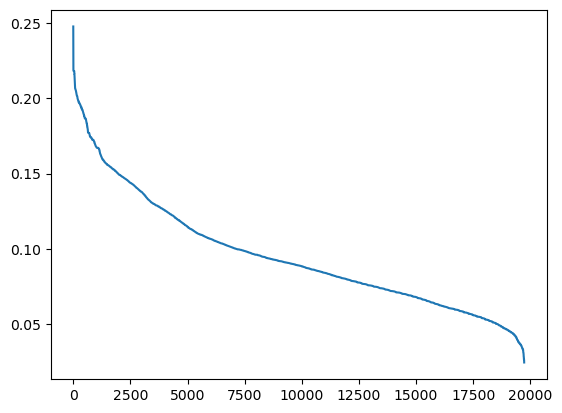

In [381]:
var[var > 1e-2].sort_values(ascending=False).plot(use_index=False)

In [382]:
# Variance quantile to drop all but the chosen number of genes showing the top variance
q = (len(var) - 5e3) / len(var)
print(f'Percentile = {round(q * 100, 1)}%')

var[var > var.quantile(q=q)].shape

Percentile = 74.7%


(4999,)

In [383]:
# Variance quantile to drop all but the chosen number of genes showing the top variance
q = (len(var) - 2e3) / len(var)
print(f'Percentile = {round(q * 100, 1)}%')

var[var > var.quantile(q=q)].shape

Percentile = 89.9%


(2000,)

In [384]:
# Get IDs for all genes to keep
genes_to_keep = list(var[var > var.quantile(q=q)].index)
genes_to_keep[:5]

['ENSG00000008128.21',
 'ENSG00000008130.14',
 'ENSG00000067606.14',
 'ENSG00000078369.16',
 'ENSG00000078808.15']

In [385]:
len(genes_to_keep)

2000

In [386]:
cnv = cnv[genes_to_keep]

In [387]:
cnv.shape

(1055, 2000)

## Save to files

In [389]:
%%time

table_to_patient_files(
    cnv, dir_path=os.path.join(DATA_LOCATION, 'CNV'), round_digits=4)

Save data to files: 1055/1055

CPU times: user 1.5 s, sys: 115 ms, total: 1.61 s
Wall time: 4.01 s


# Watermark <a class='tocSkip'></a>

In [390]:
%watermark --iversions
%watermark -v
print()
%watermark -u -n

matplotlib: 3.7.3
sklearn   : 0.0.post12
pandas    : 2.0.3
numpy     : 1.24.4
requests  : 2.32.3

Python implementation: CPython
Python version       : 3.8.20
IPython version      : 8.12.2


Last updated: Sat Jun 14 2025



[Top of the page](#Top)